In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from tensorflow.random import set_seed
from keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split

In [3]:
(X_train, y_train) , (X_test, y_test) = load_data()

# normalizacja na skali 0-1
X_train = X_train / 255
X_test = X_test / 255

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=42)


11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# wizualizacja dokładności
def plot_accuracy(result):
  plt.figure(figsize=(12,6))
  plt.plot(result.history["accuracy"], c="r")
  plt.plot(result.history["val_accuracy"], c="b")
  plt.legend(["accuracy","val_accuracy"])
  plt.show()

In [ ]:
X_train_cnn = X_train.reshape( len(X_train), 28, 28, 1 )
X_val_cnn = X_val.reshape( len(X_val), 28, 28, 1 )
X_test_cnn = X_test.reshape( len(X_test), 28, 28, 1 )

set_seed(0)

model = Sequential()
model.add( Conv2D(64, kernel_size=(3,3), input_shape=(28,28,1), activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2)) )

model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

# kompilacja sieci
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
result = model.fit(X_train_cnn, y_train, epochs=15, validation_data=(X_val_cnn, y_val) )


In [7]:
model.evaluate(X_test_cnn, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0769 - accuracy: 0.9872


[0.07694760710000992, 0.9872000217437744]

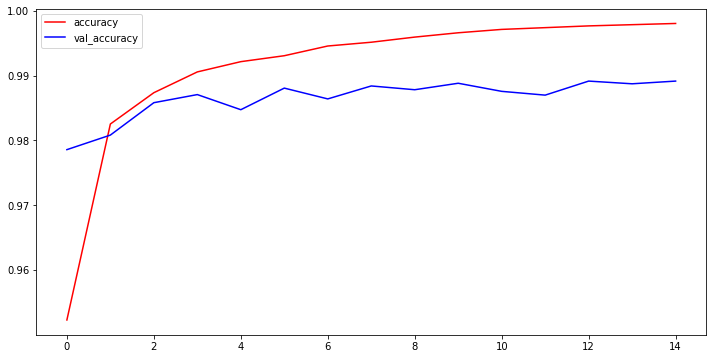

In [8]:
plot_accuracy(result)

In [9]:
X_train_cnn = X_train.reshape( len(X_train), 28, 28, 1 )
X_val_cnn = X_val.reshape( len(X_val), 28, 28, 1 )
X_test_cnn = X_test.reshape( len(X_test), 28, 28, 1 )

set_seed(0)

model = Sequential()
model.add( Conv2D(64, kernel_size=(3,3), input_shape=(28,28,1), activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2)) )
model.add(Dropout(.2))

model.add( Conv2D(128, kernel_size=(3,3), activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2)) )
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

# kompilacja sieci
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
result = model.fit(X_train_cnn, y_train, epochs=15, validation_data=(X_val_cnn, y_val) )


Epoch 1/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1367 - accuracy: 0.9577 - val_loss: 0.0574 - val_accuracy: 0.9817
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0496 - accuracy: 0.9849 - val_loss: 0.0445 - val_accuracy: 0.9879
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0391 - accuracy: 0.9883 - val_loss: 0.0329 - val_accuracy: 0.9905
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0318 - accuracy: 0.9904 - val_loss: 0.0331 - val_accuracy: 0.9904
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0294 - accuracy: 0.9920 - val_loss: 0.0413 - val_accuracy: 0.9893
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0262 - accuracy: 0.9924 - val_loss: 0.0345 - val_accuracy: 0.9908
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0241 - accuracy: 0.9928 - val_loss: 0.0359 - val_accuracy:

In [10]:
model.evaluate(X_test_cnn, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0440 - accuracy: 0.9897


[0.04399362951517105, 0.9897000193595886]

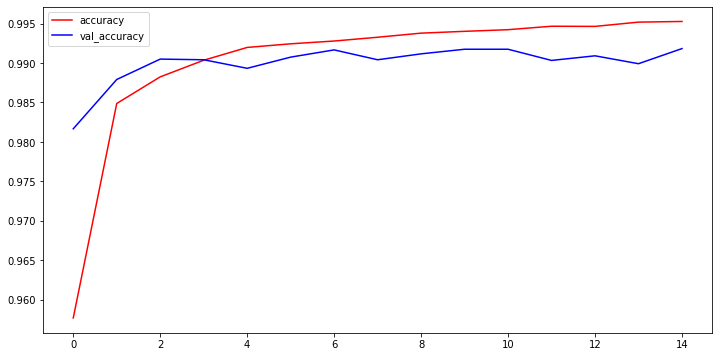

In [11]:
plot_accuracy(result)

In [56]:
IMG_INDEX = 2022
y_test[IMG_INDEX]

4

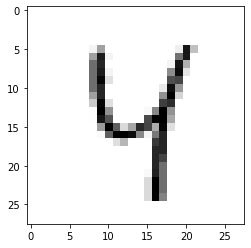

In [57]:
plt.imshow(X_test[IMG_INDEX], "gray_r")

In [58]:
model.predict(X_test[IMG_INDEX].reshape(1,28,28,1) )

array([[1.0282264e-31, 2.3197594e-18, 6.5197411e-25, 8.7146235e-27,
        1.0000000e+00, 4.3141204e-18, 6.9958160e-23, 1.0189818e-20,
        3.2346435e-17, 2.4149167e-14]], dtype=float32)

In [59]:
np.argmax( model.predict(X_test[IMG_INDEX].reshape(1,28,28,1) ) )

4

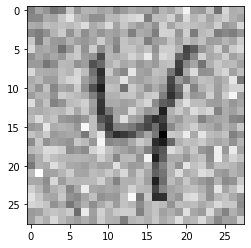

In [62]:
np.random.seed(0)
tmp = X_test[IMG_INDEX] + np.random.normal(0.4, 0.2, (28,28))
plt.imshow(tmp, "gray_r")

In [63]:
np.argmax( model.predict(tmp.reshape(1,28,28,1) ) )

4

In [64]:
from scipy.ndimage.interpolation import rotate

def crop_center(img, cropx, cropy):
  x, y = img.shape
  startx = x//2 - cropx//2
  starty = y//2 - cropy//2
  return img[ startx:startx+cropx, starty:starty+cropy ]


4


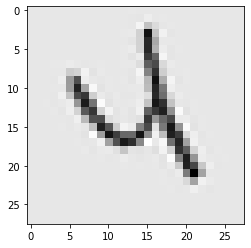

In [66]:
tmp = crop_center( rotate(X_test[IMG_INDEX], 30) , 28, 28 )
plt.imshow(tmp, 'gray_r')

print( np.argmax( model.predict(tmp.reshape(1,28,28,1) ) ) )